## Handwritten Digit Recognition Using Neural Networks and SVM

## Neural Netwroks

tensorflow and Keras

In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics


In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [7]:
model = tf.keras.models.Sequential()

In [11]:
# flatten the layer (28x28)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# dense layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2051 - accuracy: 0.9423
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1148 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9756


In [16]:
model.save('handwritten.model')

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0935 - accuracy: 0.9719


In [18]:
print(loss)
print(accuracy)

0.09351717680692673
0.9718999862670898


Uploading the test images with different digit to test the accuracy prediction of the model.

Saving 1.png to 1.png


Saving 2.png to 2.png


Saving 3.png to 3.png
1.png not found among uploaded files.
2.png not found among uploaded files.
1/1 [==============================] - 0s 18ms/step
This digit is probably 6


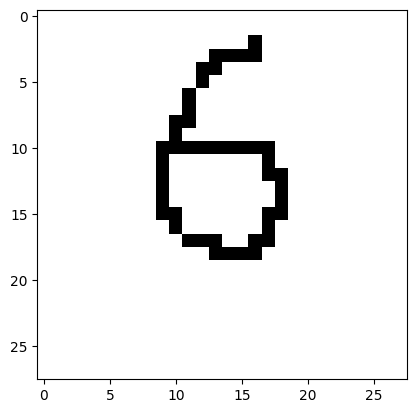

In [26]:
from google.colab import files
import time

# Upload images
uploaded_files = files.upload()
time.sleep(3)
uploaded_files = files.upload()
time.sleep(3)
uploaded_files = files.upload()
time.sleep(5)
# Process uploaded images
for image_number in range(1, 4):  # Assuming you have uploaded files named 1.png, 2.png, and 3.png
    filename = f"{image_number}.png"

    # Check if the uploaded file exists
    if filename in uploaded_files:
        try:
            img = cv2.imread(filename)[:, :, 0]
            img = np.invert(np.array([img]))
            prediction = model.predict(img)
            print(f"This digit is probably {np.argmax(prediction)}")
            plt.imshow(img[0], cmap=plt.cm.binary)
            plt.show()
        except Exception as e:
            print(f"Error processing {filename}: {e}")
    else:
        print(f"{filename} not found among uploaded files.")


Neural Network accurately predict the digit.

## Using SVM

openml

In [1]:
# Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X = mnist.data.astype("float32")
y = mnist.target.astype("int")

NameError: name 'fetch_openml' is not defined

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf = svm.SVC(gamma=0.001)

In [6]:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [7]:
y_pred = clf.predict(X_test)

In [2]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

NameError: name 'metrics' is not defined